In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/musicfeatures/data.csv
/kaggle/input/musicfeatures/data_2genre.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import StandardScaler # Import for standard scaling of the data
from sklearn.preprocessing import MinMaxScaler # Import for standard scaling of the data

from sklearn import decomposition
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [4]:
data=pd.read_csv('/kaggle/input/musicfeatures/data.csv')

In [5]:
data.head()

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00081.au,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues.00022.au,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues.00031.au,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues.00012.au,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues.00056.au,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,...,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   filename            1000 non-null   object 
 1   tempo               1000 non-null   float64
 2   beats               1000 non-null   int64  
 3   chroma_stft         1000 non-null   float64
 4   rmse                1000 non-null   float64
 5   spectral_centroid   1000 non-null   float64
 6   spectral_bandwidth  1000 non-null   float64
 7   rolloff             1000 non-null   float64
 8   zero_crossing_rate  1000 non-null   float64
 9   mfcc1               1000 non-null   float64
 10  mfcc2               1000 non-null   float64
 11  mfcc3               1000 non-null   float64
 12  mfcc4               1000 non-null   float64
 13  mfcc5               1000 non-null   float64
 14  mfcc6               1000 non-null   float64
 15  mfcc7               1000 non-null   float64
 16  mfcc8  

<Axes: xlabel='label', ylabel='count'>

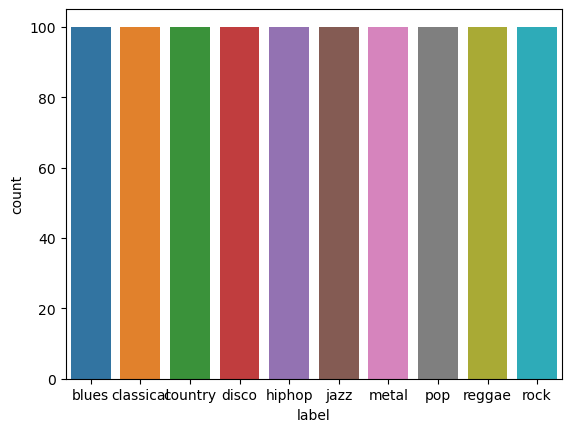

In [7]:
sns.countplot(x='label',data=data)

In [8]:
data.drop('filename',axis=1,inplace=True)

In [25]:
data.isna().sum()

NameError: name 'df' is not defined

In [ ]:
data.drop_duplicates(inplace=True)

In [9]:
data.shape

(1000, 29)

In [10]:
data.label.unique()

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

In [11]:
num=['tempo', 'beats', 'chroma_stft', 'rmse', 'spectral_centroid',
        'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2',
        'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10',
        'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17',
        'mfcc18', 'mfcc19', 'mfcc20']


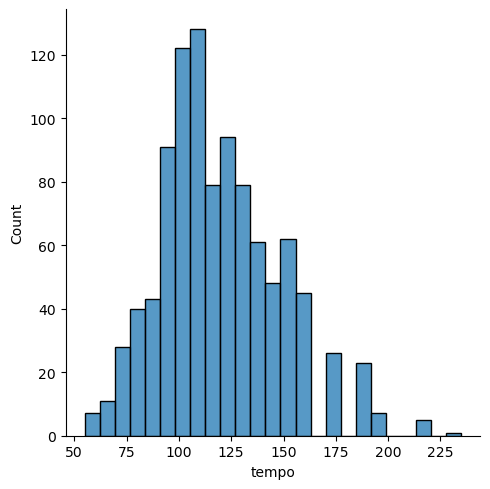

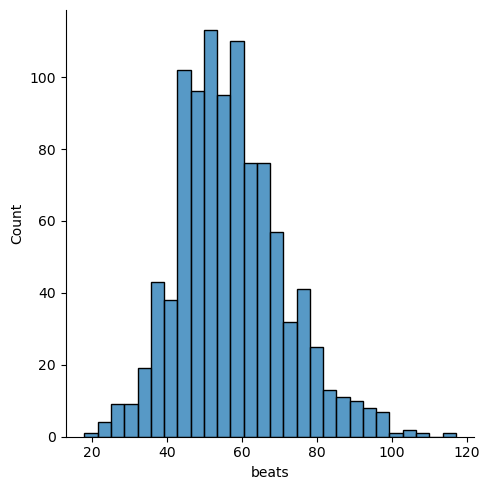

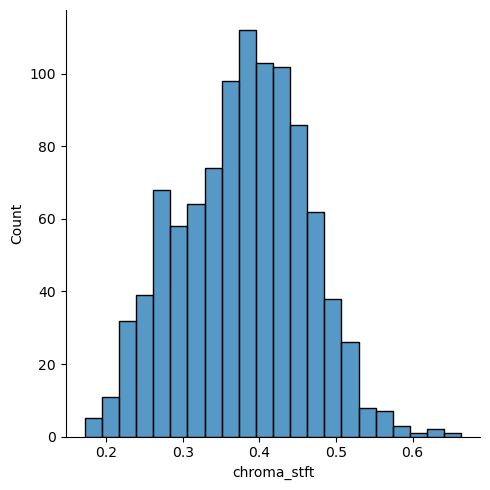

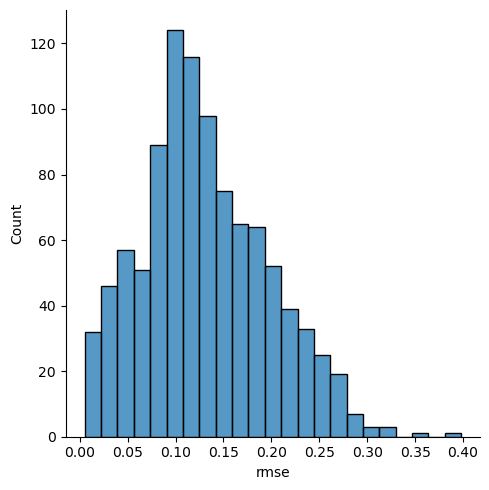

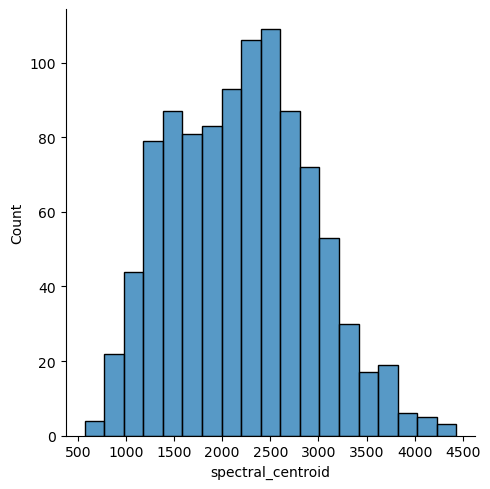

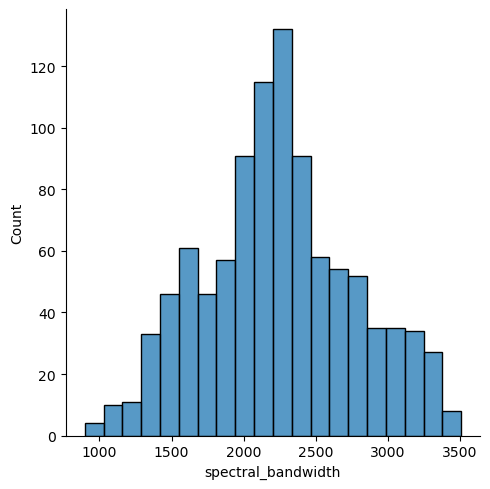

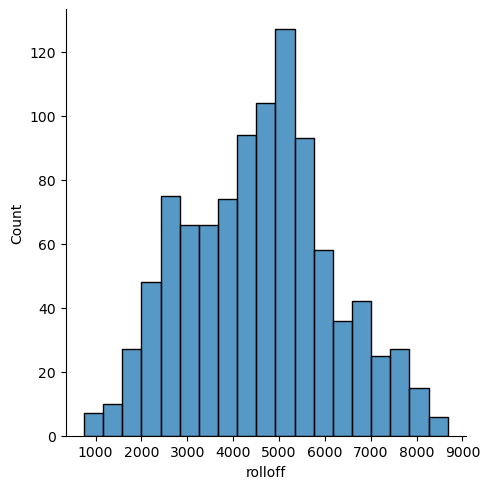

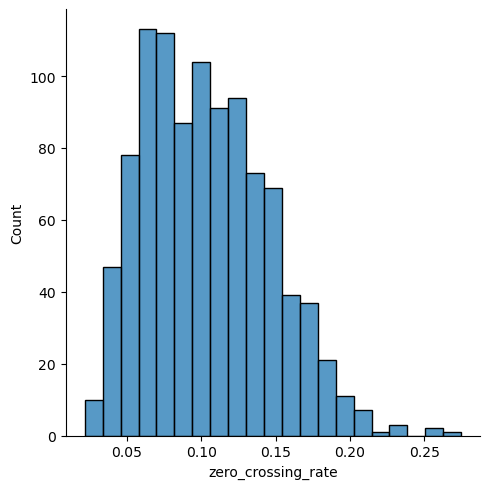

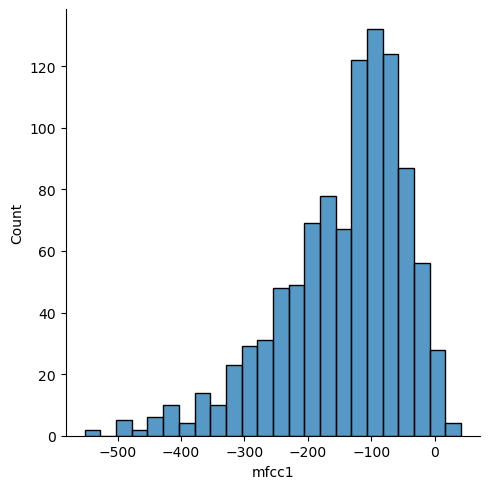

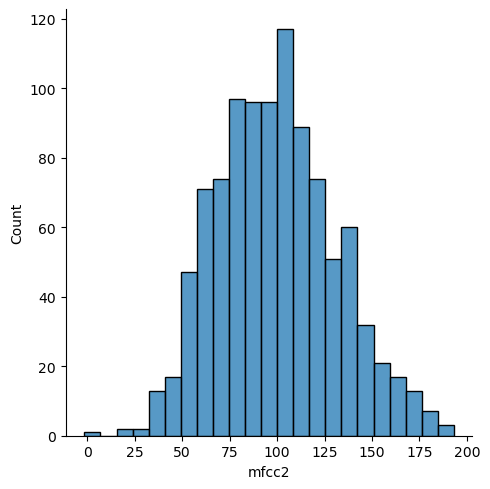

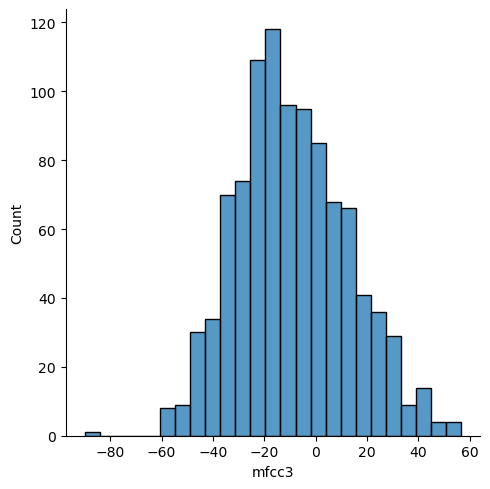

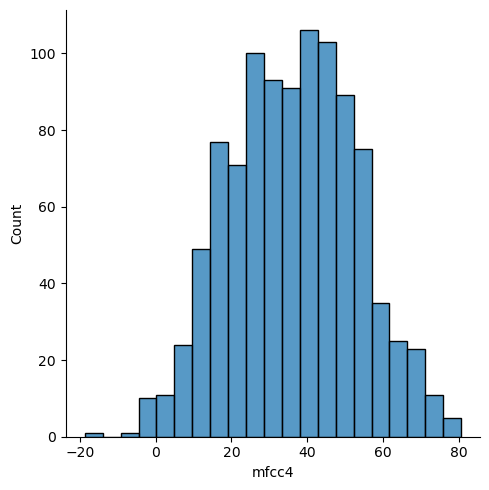

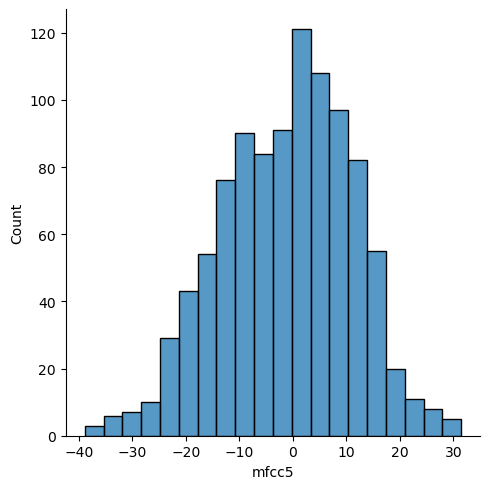

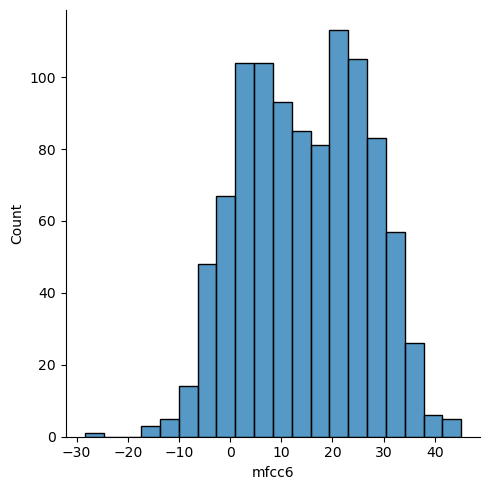

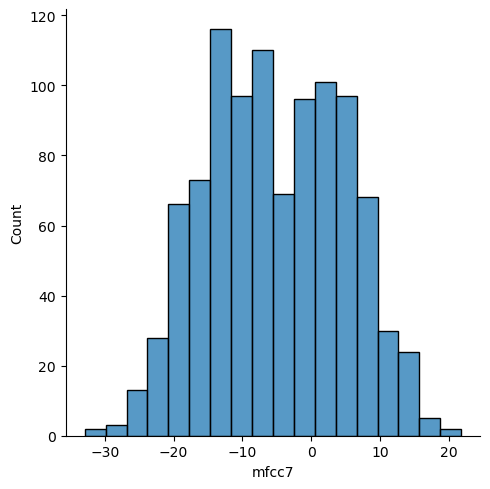

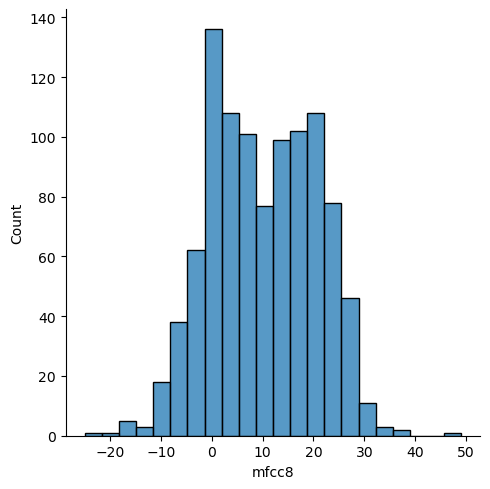

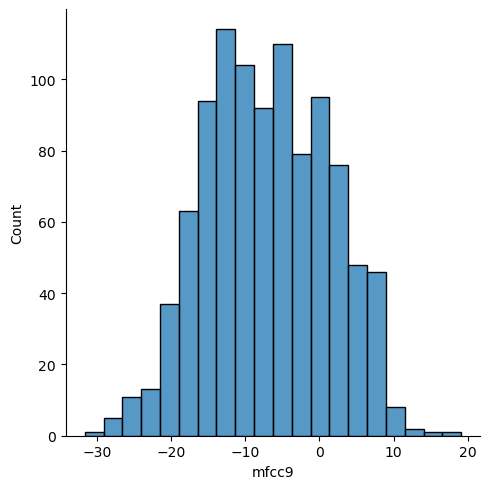

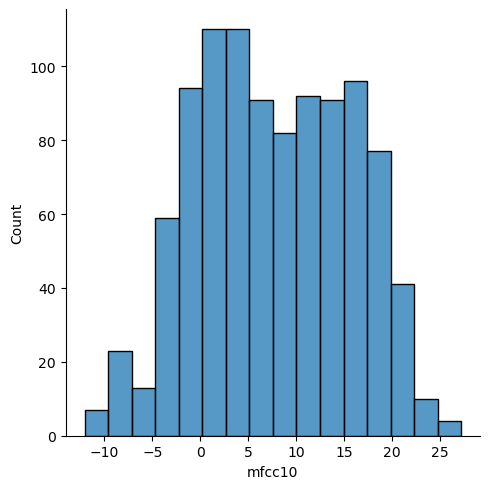

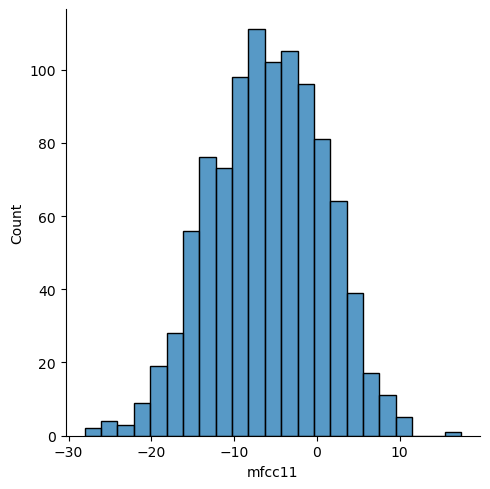

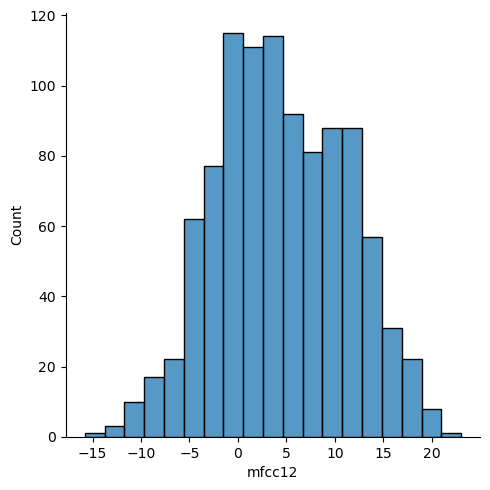

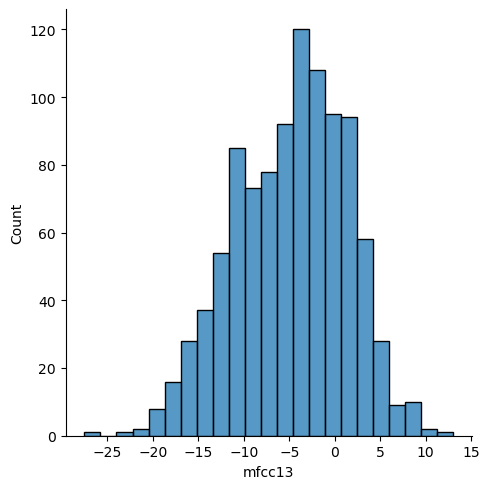

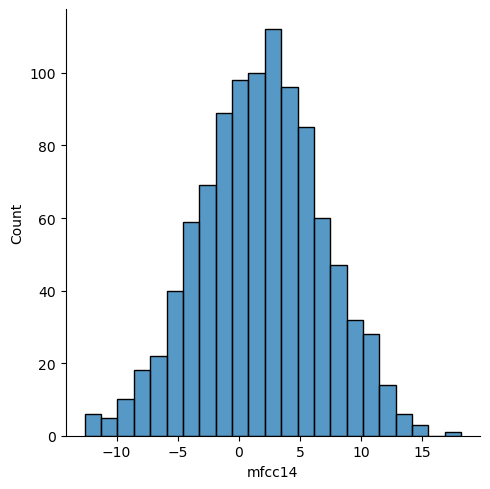

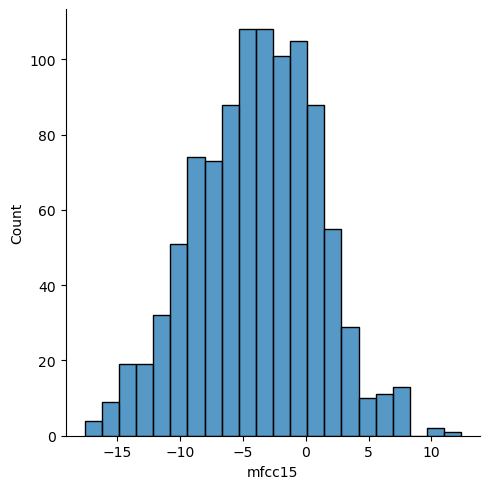

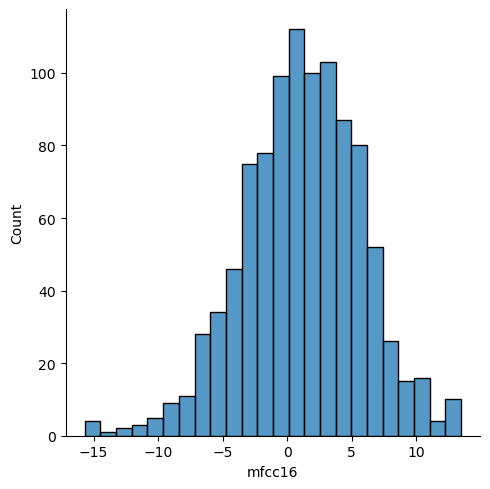

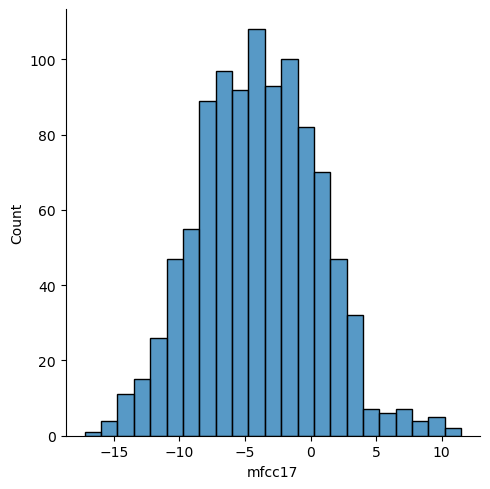

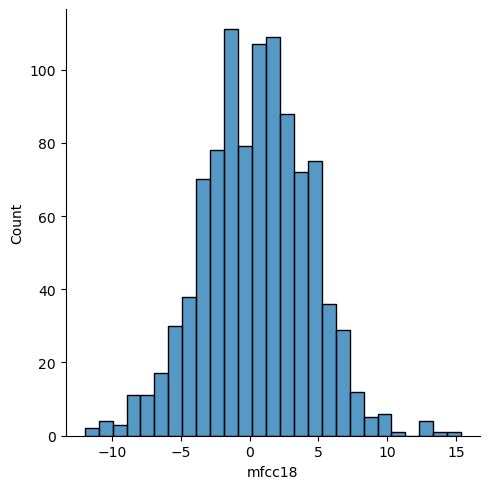

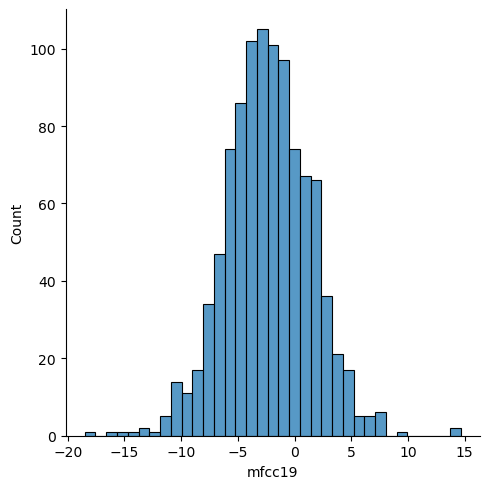

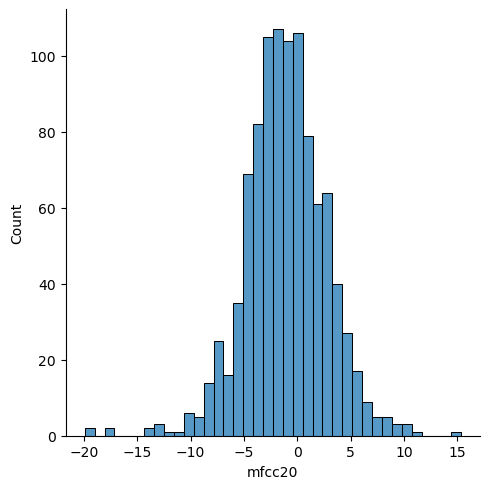

In [12]:
for i in num:
    sns.displot(x=data[i])

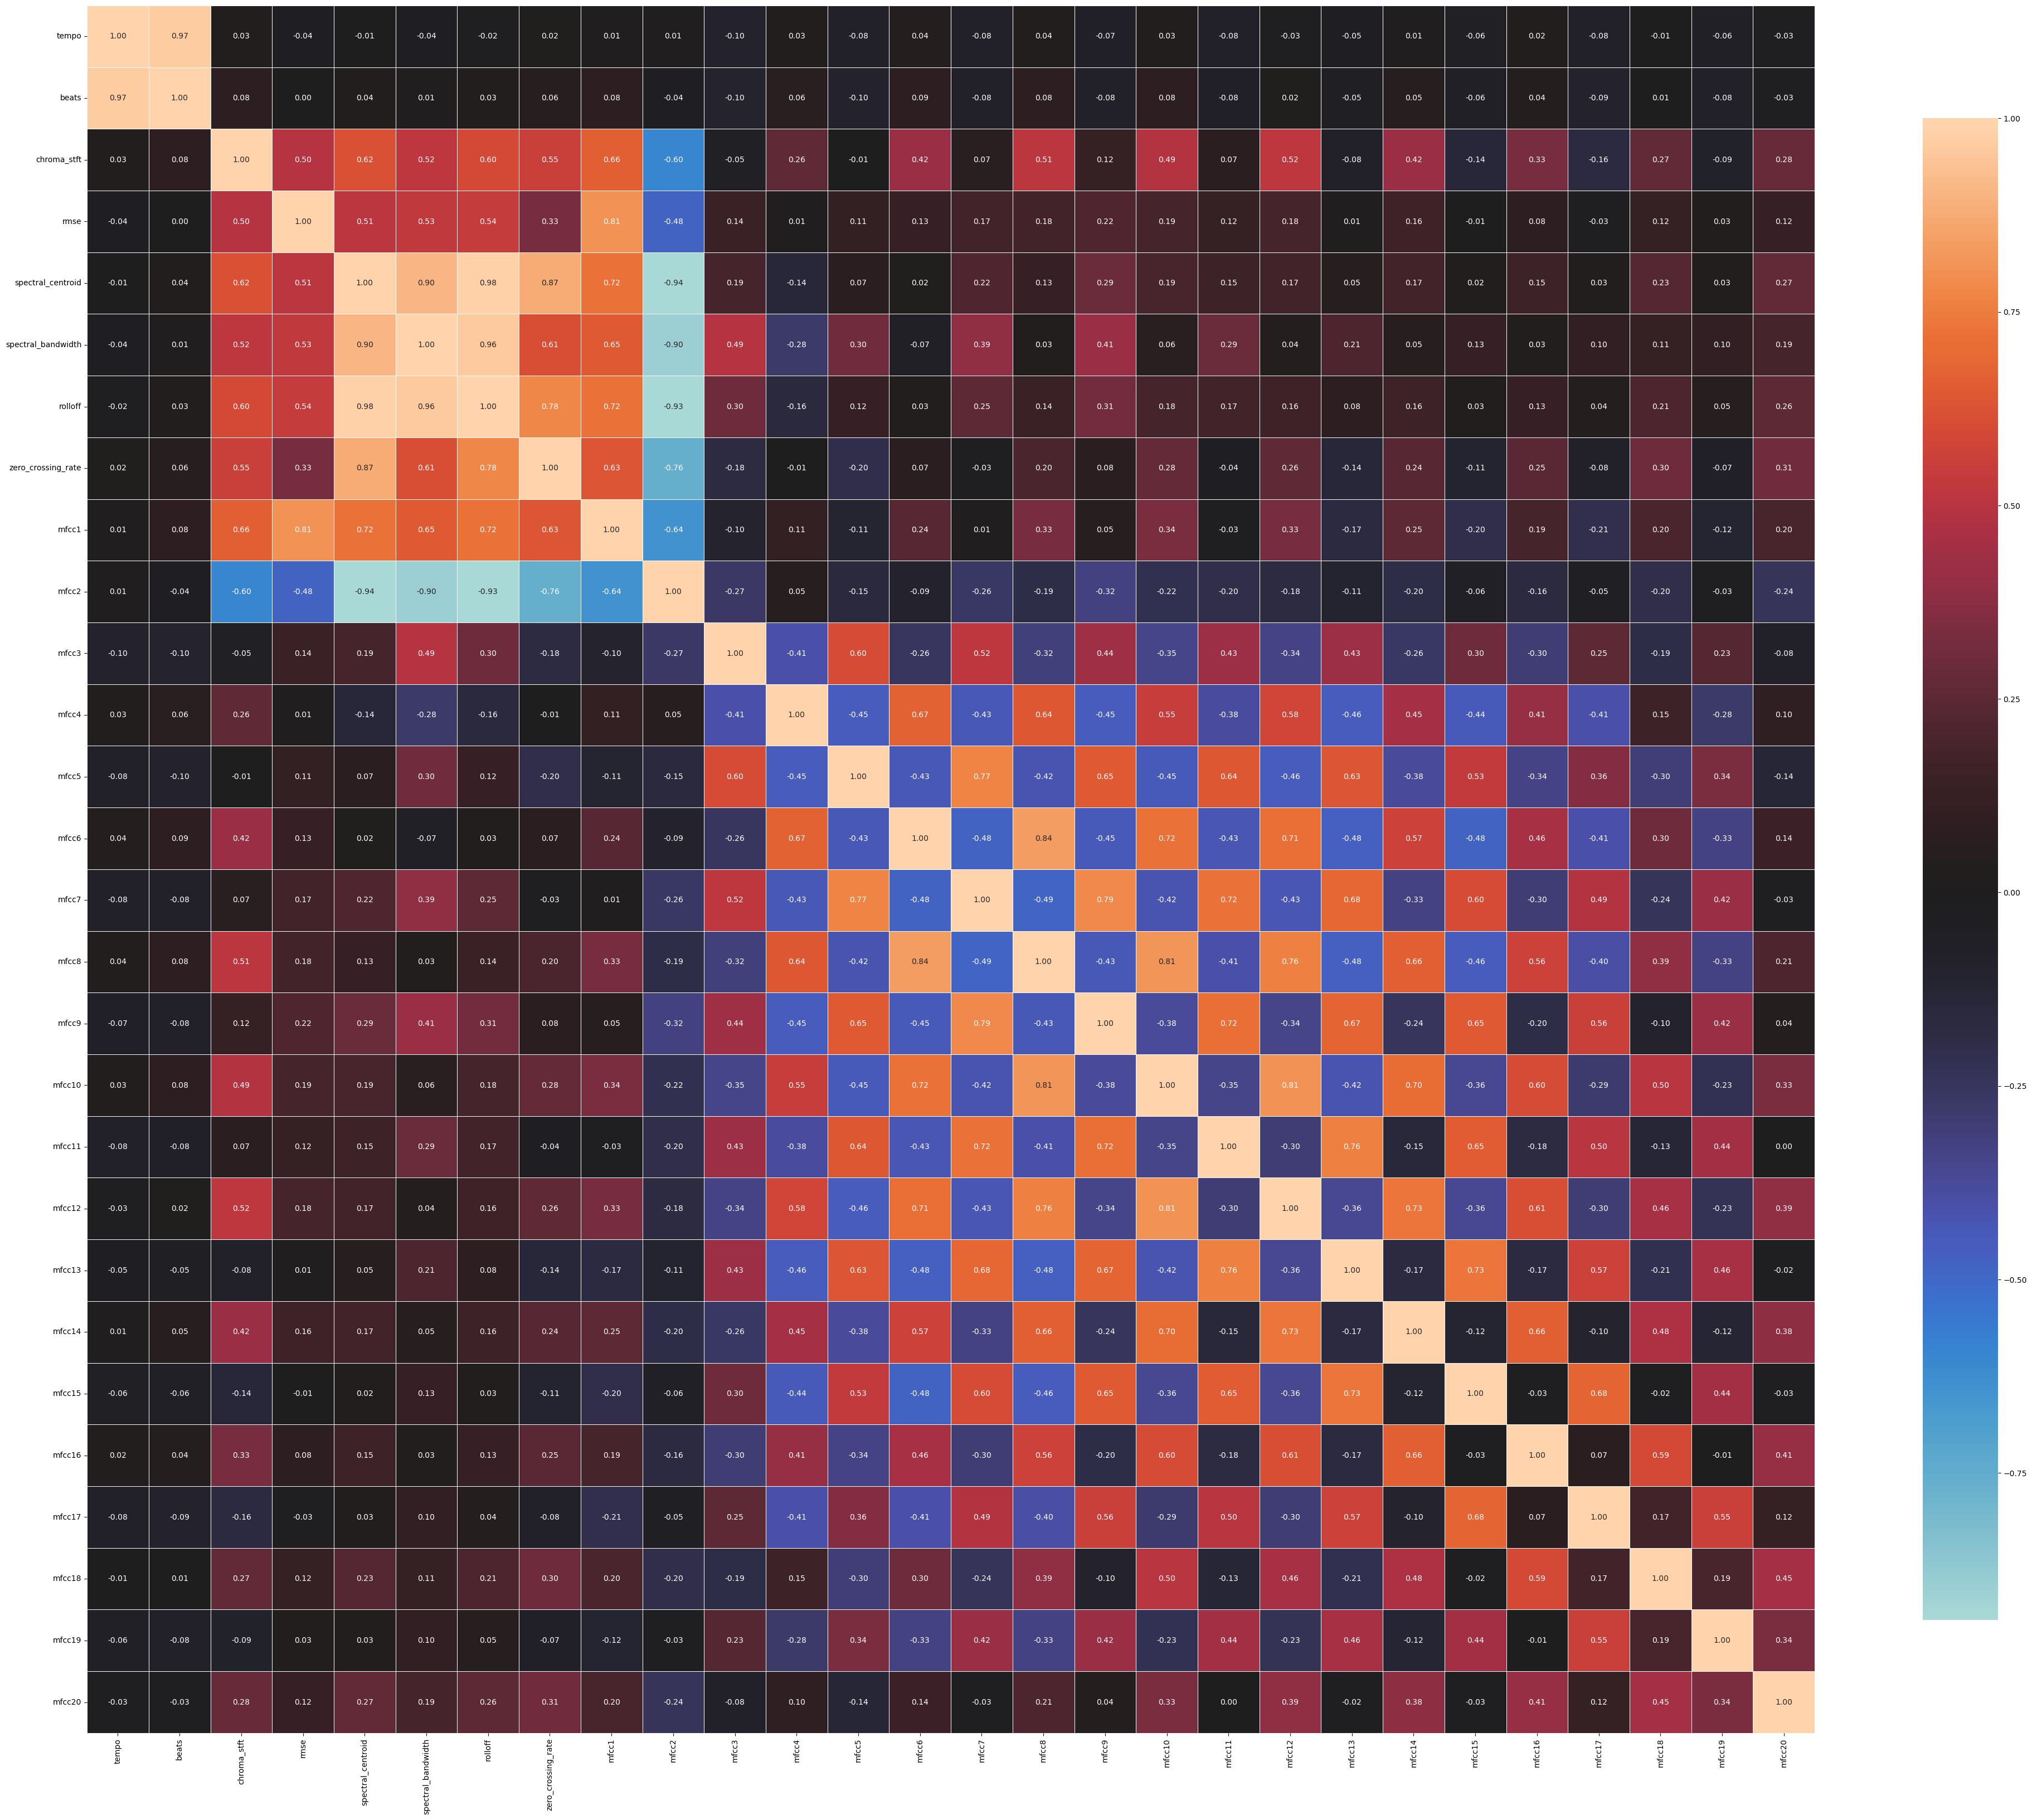

In [13]:
correlations = data.corr()

fig, ax = plt.subplots(figsize=(50,50))
sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
plt.show();

In [14]:
c = data.corr()

s = c.unstack()
s_neg = s.sort_values(ascending=True)
s_pos=s.sort_values(ascending=False)

print('neg\n',s_neg[:20:2])
print('pos\n',s_pos[28:48:2])

neg
 spectral_centroid   mfcc2   -0.940171
rolloff             mfcc2   -0.934305
spectral_bandwidth  mfcc2   -0.896660
zero_crossing_rate  mfcc2   -0.760127
mfcc2               mfcc1   -0.638911
chroma_stft         mfcc2   -0.598495
mfcc8               mfcc7   -0.487295
mfcc2               rmse    -0.483765
mfcc6               mfcc7   -0.482113
mfcc15              mfcc6   -0.479754
dtype: float64
pos
 rolloff             spectral_centroid     0.979633
beats               tempo                 0.966179
spectral_bandwidth  rolloff               0.956194
                    spectral_centroid     0.904438
spectral_centroid   zero_crossing_rate    0.874755
mfcc8               mfcc6                 0.837294
mfcc10              mfcc8                 0.811826
mfcc12              mfcc10                0.808013
mfcc1               rmse                  0.807260
mfcc9               mfcc7                 0.787006
dtype: float64


In [16]:
data['label']=data['label'].map({'blues':1, 'classical':2, 'country':3, 'disco':4, 'hiphop':5, 'jazz':6,
       'metal':6, 'pop':7, 'reggae':8, 'rock':9})

In [17]:

clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(data.drop('label',axis=1),data['label'])
feature_scores = pd.Series(clf.feature_importances_, index=data.drop('label',axis=1).columns).sort_values(ascending=False)
feature_scores

rmse                  0.067344
chroma_stft           0.067133
mfcc1                 0.055197
mfcc4                 0.053898
mfcc9                 0.044620
spectral_bandwidth    0.043995
rolloff               0.042109
zero_crossing_rate    0.038594
mfcc17                0.038135
mfcc6                 0.035269
mfcc3                 0.035134
mfcc11                0.034208
spectral_centroid     0.033418
mfcc5                 0.033089
mfcc7                 0.032929
mfcc12                0.030445
mfcc15                0.029720
mfcc13                0.028911
mfcc2                 0.028150
mfcc8                 0.027514
mfcc20                0.026784
mfcc19                0.025854
mfcc14                0.025562
beats                 0.025469
mfcc16                0.024998
tempo                 0.024748
mfcc18                0.024587
mfcc10                0.022187
dtype: float64

In [18]:
y=data['label']
df_copy=data.drop(['label','mfcc2','rolloff','tempo'],axis=1)
xtrain,xtest,ytrain,ytest=train_test_split(df_copy,y,test_size=0.25,random_state=43)

In [19]:

def hyper_tune2(name, clf, parameters, target_names=None): 
    
    target_names = target_names
    clf = clf
    search = GridSearchCV(clf, parameters,verbose=True, n_jobs=15, cv=5)
    search.fit(xtrain,ytrain)
    y_pred = search.predict(xtest)
    print ("Accuracy Score = %3.2f" %(search.score(xtest,ytest)))
    print (search.best_params_)
    print("\nClassification Report:\n", metrics.classification_report(ytest, y_pred, target_names=target_names))

In [20]:
n_neighbors = [int(x) for x in range(3,10,2)]
# weights
weights = ['uniform','distance']
# distance metric
metric = ['euclidean', 'manhattan', 'chebyshev']
# computation algorithm
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
# power paramter
p=[1,2]

parameters = { 'n_neighbors': n_neighbors,
              'weights':weights,
              'metric':metric,
              'p':p,
              'algorithm': algorithm              
               }

hyper_tune2('KNN', KNeighborsClassifier(), parameters)

Fitting 5 folds for each of 192 candidates, totalling 960 fits
Accuracy Score = 0.36
{'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}

Classification Report:
               precision    recall  f1-score   support

           1       0.22      0.32      0.26        22
           2       0.72      0.78      0.75        23
           3       0.20      0.21      0.20        24
           4       0.28      0.30      0.29        30
           5       0.16      0.19      0.17        21
           6       0.49      0.38      0.43        60
           7       0.50      0.50      0.50        20
           8       0.44      0.46      0.45        24
           9       0.16      0.12      0.13        26

    accuracy                           0.36       250
   macro avg       0.35      0.36      0.35       250
weighted avg       0.37      0.36      0.36       250



In [23]:
def run_models(xtrain: pd.DataFrame , ytrain: pd.DataFrame, xtest: pd.DataFrame, ytest: pd.DataFrame):
    #scaling
    mm = MinMaxScaler()
    X_train_mm_scaled = mm.fit_transform(xtrain)
    X_test_mm_scaled = mm.transform(xtest)
    
    #applying PCA
    pca = decomposition.PCA(n_components=20)
    pca.fit(X_train_mm_scaled)
    X_pca = pca.transform(X_train_mm_scaled)
    test_pca=pca.transform(X_test_mm_scaled)
    
    
    models = [                                               
          ('KNN', KNeighborsClassifier(n_neighbors=3,weights='distance',p=1,metric='euclidean'))
        ]  
    
    for name, model in models:        
        # unscaled data
        clf = model.fit(xtrain, ytrain)
        y_pred = clf.predict(xtest)
        
        # scaled data
        
        clf_mm_scaled = model.fit(X_train_mm_scaled, ytrain)
        y_pred_mm_scaled = clf_mm_scaled.predict(X_test_mm_scaled)
        
        #PCA scaled
        
        clf_pca_scaled = model.fit(X_pca, ytrain)
        y_pred_pca_scaled = clf_pca_scaled.predict(test_pca)

        
        # accuracy scores
        accuracy = round(metrics.accuracy_score(ytest, y_pred),5)
        scaled_pca_accuracy = round(metrics.accuracy_score(ytest, y_pred_pca_scaled),5)
        scaled_mm_accuracy = round(metrics.accuracy_score(ytest, y_pred_mm_scaled),5)
        
        # output
        print(name + ':')        
        print("---------------------------------------------------------------")      
        print("Accuracy:", accuracy)
        print("Accuracy w/Scaled Data (pca):", scaled_pca_accuracy)
        print("Accuracy w/Scaled Data (mm):", scaled_mm_accuracy)
        if (accuracy > scaled_pca_accuracy) and (accuracy > scaled_mm_accuracy):
            print("\nClassification Report:\n", metrics.classification_report(ytest, y_pred))      
            print("                            -----------------------------------               \n")      
        elif (scaled_pca_accuracy > scaled_mm_accuracy):
            print("\nClassification Report (pca):\n", metrics.classification_report(ytest, y_pred_pca_scaled))      
            print("                            -----------------------------------               \n")     
        else:            
            print("\nClassification Report (mm):\n", metrics.classification_report(ytest, y_pred_mm_scaled))      
            print("                            -----------------------------------               \n")   

In [24]:
run_models(xtrain, ytrain, xtest, ytest)

KNN:
---------------------------------------------------------------
Accuracy: 0.296
Accuracy w/Scaled Data (pca): 0.588
Accuracy w/Scaled Data (mm): 0.576

Classification Report (ss):
               precision    recall  f1-score   support

           1       0.62      0.68      0.65        22
           2       0.65      0.87      0.74        23
           3       0.48      0.58      0.53        24
           4       0.38      0.33      0.36        30
           5       0.62      0.62      0.62        21
           6       0.80      0.55      0.65        60
           7       0.65      0.55      0.59        20
           8       0.59      0.67      0.63        24
           9       0.44      0.58      0.50        26

    accuracy                           0.59       250
   macro avg       0.58      0.60      0.59       250
weighted avg       0.61      0.59      0.59       250

                            -----------------------------------               

